<a href="https://colab.research.google.com/github/mhmd2015/ImageProcessing1UIC/blob/main/DIP_UIC_JPEG_DCT_Demo2_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JPEG DCT Demo**
This is a great demo of the Discrete Cosine Transform (DCT) and is the essence of JPEG encoding.

In [1]:
# Import functions and libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt




Show original

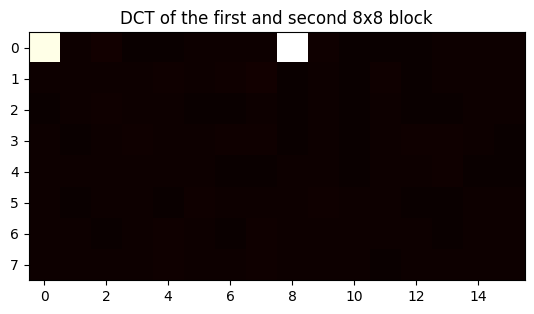

In [29]:
# Load the image in grayscale
image = cv2.imread('boat.bmp', cv2.IMREAD_GRAYSCALE)

# Initialize a list to hold DCT coefficients for each block
dct_blocks = []

# Divide the image into 8x8 blocks and compute DCT for each block
rows, cols = image.shape
for i in range(0, rows, 8):
    for j in range(0, cols, 8):
        block = image[i:i+8, j:j+8]

        # Compute DCT and store in our list
        dct_block = cv2.dct(np.float32(block))
        dct_blocks.append(dct_block)

# (Optional) Visualize the DCT of the first block
#plt.imshow(dct_blocks[0], cmap='hot', interpolation='nearest')
#
plt.imshow(np.hstack( (dct_blocks[0],dct_blocks[1])), cmap='hot', interpolation='nearest')
plt.title('DCT of the first and second 8x8 block')

plt.show()



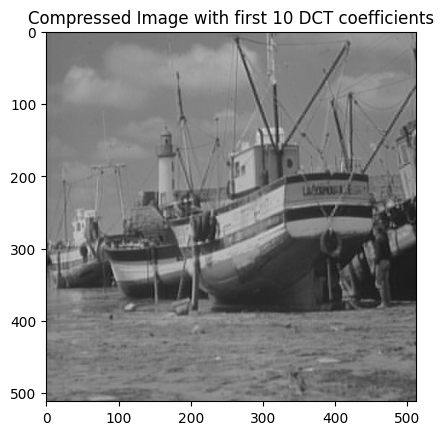

In [6]:
def zigzag_indices(block_size):
    """Generate zigzag order indices for a given block size."""
    indices = np.array([(x,y) for x in range(block_size) for y in range(block_size)])
    return sorted(indices, key=lambda x: (x[0]+x[1], -x[1] if (x[0]+x[1]) % 2 else x[1]))

# Load the image in grayscale
image = cv2.imread('boat.bmp', cv2.IMREAD_GRAYSCALE)

rows, cols = image.shape
compressed_image = np.zeros_like(image, dtype=np.float32)

# Zigzag order for 8x8 block
zz_order = zigzag_indices(8)

dct_coeffecient = 10;

# Process each 8x8 block
for i in range(0, rows, 8):
    for j in range(0, cols, 8):

        # Compute DCT of the block
        dct_block = cv2.dct(np.float32(image[i:i+8, j:j+8]))

        # Zero out all coefficients except the first 10 in zigzag order
        for k in range(dct_coeffecient, 64):  # There are 64 coefficients in an 8x8 block
            x, y = zz_order[k]
            dct_block[x, y] = 0

        # Compute inverse DCT to get compressed block
        compressed_block = cv2.idct(dct_block)
        compressed_image[i:i+8, j:j+8] = compressed_block

# Display the compressed image
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image with first 10 DCT coefficients')
plt.show()


In [7]:
cv2.imwrite("boat.jpg",compressed_image)

True

In [15]:
import os
block_size = 8*8
dct_size = 10

CR = block_size / dct_size
print("The compress ratio is {} ".format(CR))

# to make sure
image_size = os.path.getsize("boat.bmp")
compressed_size = os.path.getsize("boat.jpg")

CR = image_size / compressed_size;
print("The compress ratio by calc file size is {} ".format(CR))

The compress ratio is 6.4 
The compress ratio by calc file size is 5.919091522374635 


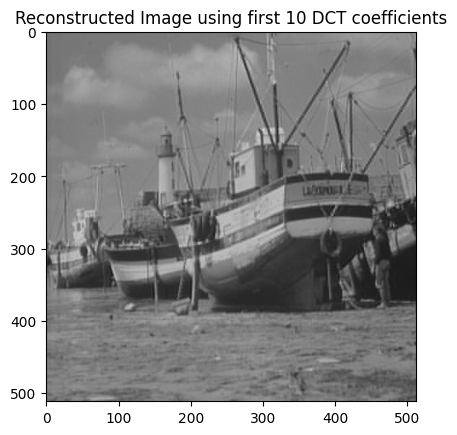

In [16]:

# Load the image in grayscale
image = cv2.imread('boat.bmp', cv2.IMREAD_GRAYSCALE)

rows, cols = image.shape
reconstructed_image = np.zeros_like(image, dtype=np.float32)

# Zigzag order for 8x8 block
zz_order = zigzag_indices(8)

dct_coefficient = 10;
# Process each 8x8 block
for i in range(0, rows, 8):
    for j in range(0, cols, 8):

        # Compute DCT of the block
        dct_block = cv2.dct(np.float32(image[i:i+8, j:j+8]))

        # Zero out all coefficients except the first 10 in zigzag order
        for k in range(dct_coefficient, 64):  # There are 64 coefficients in an 8x8 block
            x, y = zz_order[k]
            dct_block[x, y] = 0

        # Compute inverse DCT to get reconstructed block
        reconstructed_block = cv2.idct(dct_block)
        reconstructed_image[i:i+8, j:j+8] = reconstructed_block

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image using first 10 DCT coefficients')
plt.show()

Text(0.5, 1.0, 'Comparison between compressed and reconstructed images')

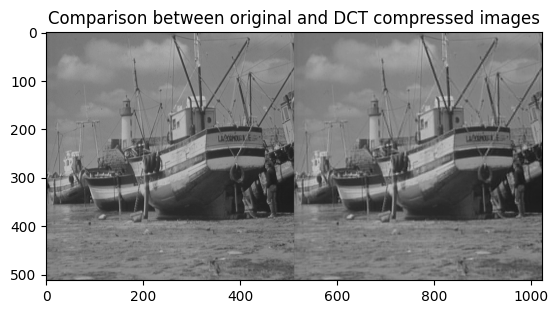

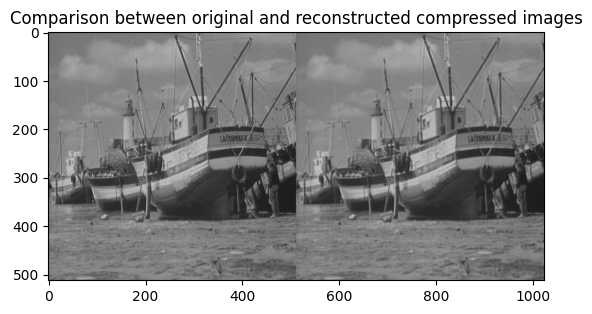

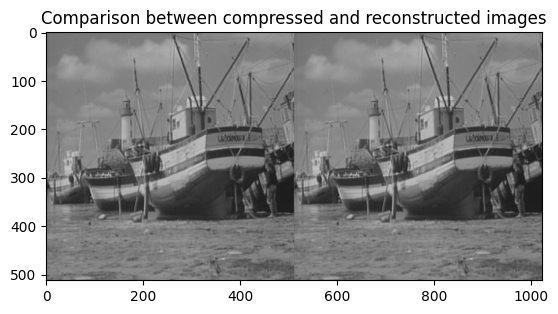

In [19]:
plt.figure()
plt.imshow( np.hstack( (image, compressed_image) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

plt.figure()
plt.imshow( np.hstack( (image, reconstructed_image) ) ,cmap='gray')
plt.title("Comparison between original and reconstructed compressed images" )

plt.figure()
plt.imshow( np.hstack( (compressed_image, reconstructed_image) ) ,cmap='gray')
plt.title("Comparison between compressed and reconstructed images" )

In [21]:


# Load the original image in grayscale
original_image = cv2.imread('boat.bmp', cv2.IMREAD_GRAYSCALE)

# Assuming `reconstructed_image` is your reconstructed image from the previous step

# Compute MSE
mse = np.mean((original_image - reconstructed_image) ** 2)

# Compute PSNR
max_pixel_value = 255.0
psnr = 10 * np.log10(max_pixel_value**2 / mse)

print(f'Mean Square Error (MSE): {mse}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr} dB')

Mean Square Error (MSE): 171.86964416503906
Peak Signal-to-Noise Ratio (PSNR): 25.77881183051018 dB


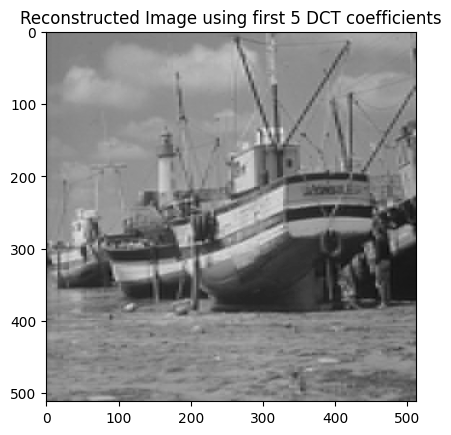

In [20]:

# Load the image in grayscale
image = cv2.imread('boat.bmp', cv2.IMREAD_GRAYSCALE)

rows, cols = image.shape
reconstructed_image = np.zeros_like(image, dtype=np.float32)

# Zigzag order for 8x8 block
zz_order = zigzag_indices(8)

dct_coefficient = 5;
# Process each 8x8 block
for i in range(0, rows, 8):
    for j in range(0, cols, 8):

        # Compute DCT of the block
        dct_block = cv2.dct(np.float32(image[i:i+8, j:j+8]))

        # Zero out all coefficients except the first 10 in zigzag order
        for k in range(dct_coefficient, 64):  # There are 64 coefficients in an 8x8 block
            x, y = zz_order[k]
            dct_block[x, y] = 0

        # Compute inverse DCT to get reconstructed block
        reconstructed_block = cv2.idct(dct_block)
        reconstructed_image[i:i+8, j:j+8] = reconstructed_block

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image using first 5 DCT coefficients')
plt.show()

3)	Now repeat the same compression procedure by computing 16x16-point Fourier transform (instead of the DCT). Recall that we are dealing with real-valued images. This means that their Fourier representation should be conjugate-symmetric X[k,m] = X*[16k,16-m]. You should ensure that the compressed representation is also conjugatesymmetric. Keep only 10 Fourier values and show the resulting image and find the mean square error. Compare your result with the DCT based procedure in Q1.

Sure, let's use the Fourier Transform instead of the DCT.

To apply the Fourier Transform on the image blocks and retain conjugate symmetry, follow these steps:

Compute the 2D FFT on the 16x16 block.
Zero out all Fourier coefficients except the top 10 in magnitude.
Ensure that the remaining non-zero coefficients have their corresponding conjugate-symmetric pairs.
Compute the inverse 2D FFT to obtain the reconstructed block.
Let's translate these steps into Python code:

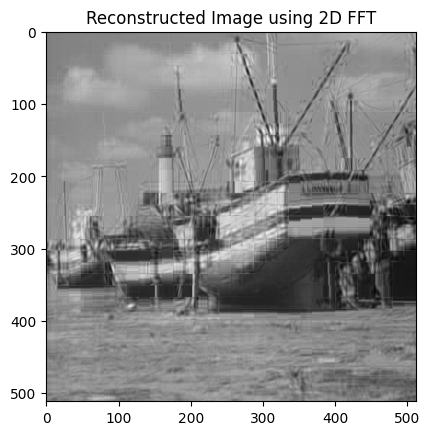

Mean Square Error (MSE) for 2D FFT: 176.01089477539062
Peak Signal-to-Noise Ratio (PSNR) for 2D FFT: 25.6754081013107 dB


In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('boat.bmp', cv2.IMREAD_GRAYSCALE)

rows, cols = image.shape
reconstructed_image_fft = np.zeros_like(image, dtype=np.float32)

def conjugate_symmetry(pair, shape):
    """Returns the conjugate-symmetric index of a given pair."""
    return ((shape[0] - pair[0]) % shape[0], (shape[1] - pair[1]) % shape[1])

# Process each 16x16 block
for i in range(0, rows, 16):
    for j in range(0, cols, 16):

        # Compute 2D FFT of the block
        fft_block = np.fft.fft2(image[i:i+16, j:j+16])

        # Flatten and find indices of top 10 coefficients in magnitude
        flattened = fft_block.flatten()
        top10_indices = np.argsort(np.abs(flattened))[-10:]

        # Zero out all coefficients except the top 10 in magnitude
        mask = np.zeros_like(flattened, dtype=bool)
        for idx in top10_indices:
            mask[idx] = True
            # Ensure its conjugate-symmetric pair is also non-zero
            x, y = np.unravel_index(idx, (16, 16))
            cx, cy = conjugate_symmetry((x, y), (16, 16))
            mask[np.ravel_multi_index((cx, cy), (16, 16))] = True
        mask = mask.reshape(16, 16)
        fft_block[~mask] = 0

        # Compute inverse 2D FFT to get reconstructed block
        reconstructed_block = np.fft.ifft2(fft_block).real
        reconstructed_image_fft[i:i+16, j:j+16] = reconstructed_block

# Display the reconstructed image
plt.imshow(reconstructed_image_fft, cmap='gray')
plt.title('Reconstructed Image using 2D FFT')
plt.show()

# Compute MSE and PSNR for the reconstructed image using 2D FFT
mse_fft = np.mean((original_image - reconstructed_image_fft) ** 2)
psnr_fft = 10 * np.log10(max_pixel_value**2 / mse_fft)

print(f'Mean Square Error (MSE) for 2D FFT: {mse_fft}')
print(f'Peak Signal-to-Noise Ratio (PSNR) for 2D FFT: {psnr_fft} dB')

4)	Given that X[1,1]=5+j4 in 16 by 16 Fourier transform. What is X[16-1,16-1]?.

In [2]:
import numpy as np

# Define the previous and current frames
previous_frame = np.array([
    [5, 5, 6, 5, 5],
    [5, 10, 10, 5, 5],
    [5, 9, 10, 5, 5],
    [5, 5, 5, 5, 5],
    [4, 5, 5, 5, 6]
])

current_frame = np.array([
    [5, 5, 6, 5, 5],
    [5, 4, 5, 5, 4],
    [3, 5, 10, 10, 5],
    [6, 6, 10, 10, 5],
    [5, 5, 6, 5, 5]
])

# Define the target block from the current frame
target_block = np.array([
    [10, 10],
    [10, 10]
])

# Initialize variables to store the minimum MSE and its location
min_mse = float('inf')
mv = (0, 0)

# Loop over all possible 2x2 blocks in the previous frame
for i in range(previous_frame.shape[0] - 1):
    for j in range(previous_frame.shape[1] - 1):
        block = previous_frame[i:i+2, j:j+2]
        mse = np.mean((target_block - block)**2)

        # If this block has a lower MSE than the previous minimum, update the min_mse and mv
        if mse < min_mse:
            min_mse = mse
            mv = (i-2, j-2)

print("Motion Vector:", mv)


Motion Vector: (-1, -1)


To determine the motion vector using the Sum of Absolute Differences (SAD) method for block-based motion estimation, the procedure is similar to the MSE method, but the metric for comparison is different.

Given the 2x2 block in the current frame (starting at row 3, column 3):

For each potential 2x2 block in the previous frame, compute the SAD:

SAD formula for a 2x2 block:
SAD=∑
i=1 =>2
2

 ∑
j=1 => 2
​∣block
current
​ (i,j)−block
previous
​
 (i,j)∣

Compute SAD for each possible block:

For block starting at (1,1):
SAD=∣10−5∣+∣10−5∣+∣10−5∣+∣10−10∣=15

For block starting at (1,2):
SAD=∣10−5∣+∣10−6∣+∣10−10∣+∣10−10∣=9

For block starting at (1,3):
... and so on ...

After calculating the SAD for all possible blocks, the one with the lowest SAD is our best match. Let's say this is at position (r,c) in the previous frame.

The motion vector

MV will be:
MV=(Starting row of block in previous frame−Starting row of block in current frame,Starting column of block in previous frame−Starting column of block in current frame)

To determine the final motion vector, you'd need to compute the SAD for each possible block and then apply the above formula. The block with the lowest SAD will be your best match, and its location will determine the motion vector.

In [1]:
import numpy as np

# Define the previous and current frames
previous_frame = np.array([
    [5, 5, 6, 5, 5],
    [5, 10, 10, 5, 5],
    [5, 9, 10, 5, 5],
    [5, 5, 5, 5, 5],
    [4, 5, 5, 5, 6]
])

current_frame = np.array([
    [5, 5, 6, 5, 5],
    [5, 4, 5, 5, 4],
    [3, 5, 10, 10, 5],
    [6, 6, 10, 10, 5],
    [5, 5, 6, 5, 5]
])

# Define the target block from the current frame
target_block = np.array([
    [10, 10],
    [10, 10]
])

# Initialize variables to store the minimum SAD and its location
min_sad = float('inf')
mv = (0, 0)

# Loop over all possible 2x2 blocks in the previous frame
for i in range(previous_frame.shape[0] - 1):
    for j in range(previous_frame.shape[1] - 1):
        block = previous_frame[i:i+2, j:j+2]
        sad = np.sum(np.abs(target_block - block))

        # If this block has a lower SAD than the previous minimum, update the min_sad and mv
        if sad < min_sad:
            min_sad = sad
            mv = (i-2, j-2)

print("Motion Vector:", mv)


Motion Vector: (-1, -1)
